In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [10]:
file_path = r'C:\Users\saket\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv'
df = pd.read_csv(file_path)

In [14]:
print(df.head(21))

      ID   Source  Severity           Start_Time             End_Time  \
0    A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1    A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2    A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3    A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4    A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
5    A-6  Source2         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
6    A-7  Source2         2  2016-02-08 07:59:35  2016-02-08 08:29:35   
7    A-8  Source2         3  2016-02-08 07:59:58  2016-02-08 08:29:58   
8    A-9  Source2         2  2016-02-08 08:00:40  2016-02-08 08:30:40   
9   A-10  Source2         3  2016-02-08 08:10:04  2016-02-08 08:40:04   
10  A-11  Source2         3  2016-02-08 08:14:42  2016-02-08 08:44:42   
11  A-12  Source2         3  2016-02-08 08:21:27  2016-02-08 08:51:27   
12  A-13  Source2         2  2016-02-08 08:36:34  2

In [26]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [15]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=['Start_Time'], inplace=True)
print(df.head())



    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
0 -84.058723      NaN      NaN          0.01  ...      False   False  False   
1 -82.831184      NaN      NaN          0.01  ...      False   False  False   
2 -84.032608      NaN      NaN          0.01  ...      False   False  False   
3 -84.205582      NaN      NaN          0.01  ...      False   False  False   
4 -84.188354      NaN      NaN          0.01  ...      False   False  False   

  Traffic_Calming Traffic_Signal Turni

In [27]:
subset_columns = ['Weather_Condition']
if 'Road_Condition' in df.columns:
    subset_columns.append('Road_Condition')
df.dropna(subset=subset_columns, inplace=True)




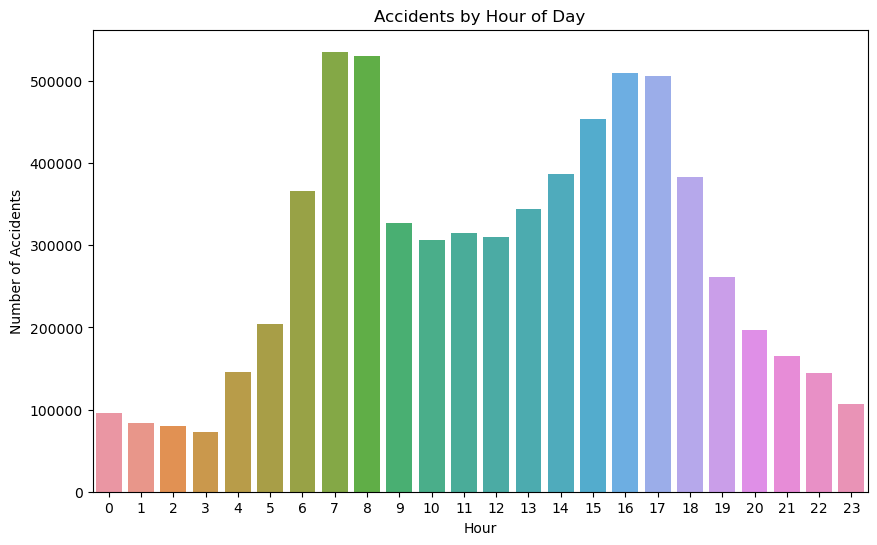

In [33]:
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

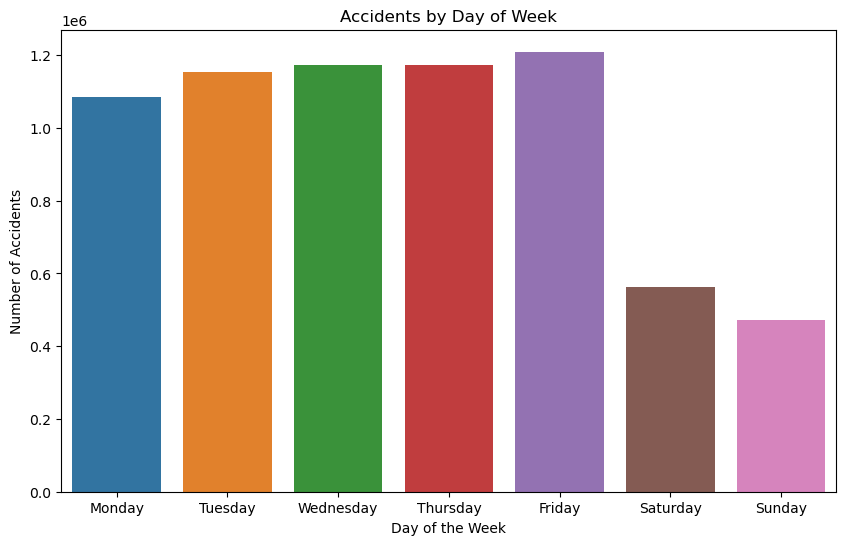

In [34]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# Relationship between road conditions and accidents (if 'Road_Condition' exists)


In [36]:
if 'Road_Condition' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Road_Condition', data=df)
    plt.title('Accidents by Road Condition')
    plt.xlabel('Road Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=90)
    plt.show()

# Relationship between weather conditions and accidents

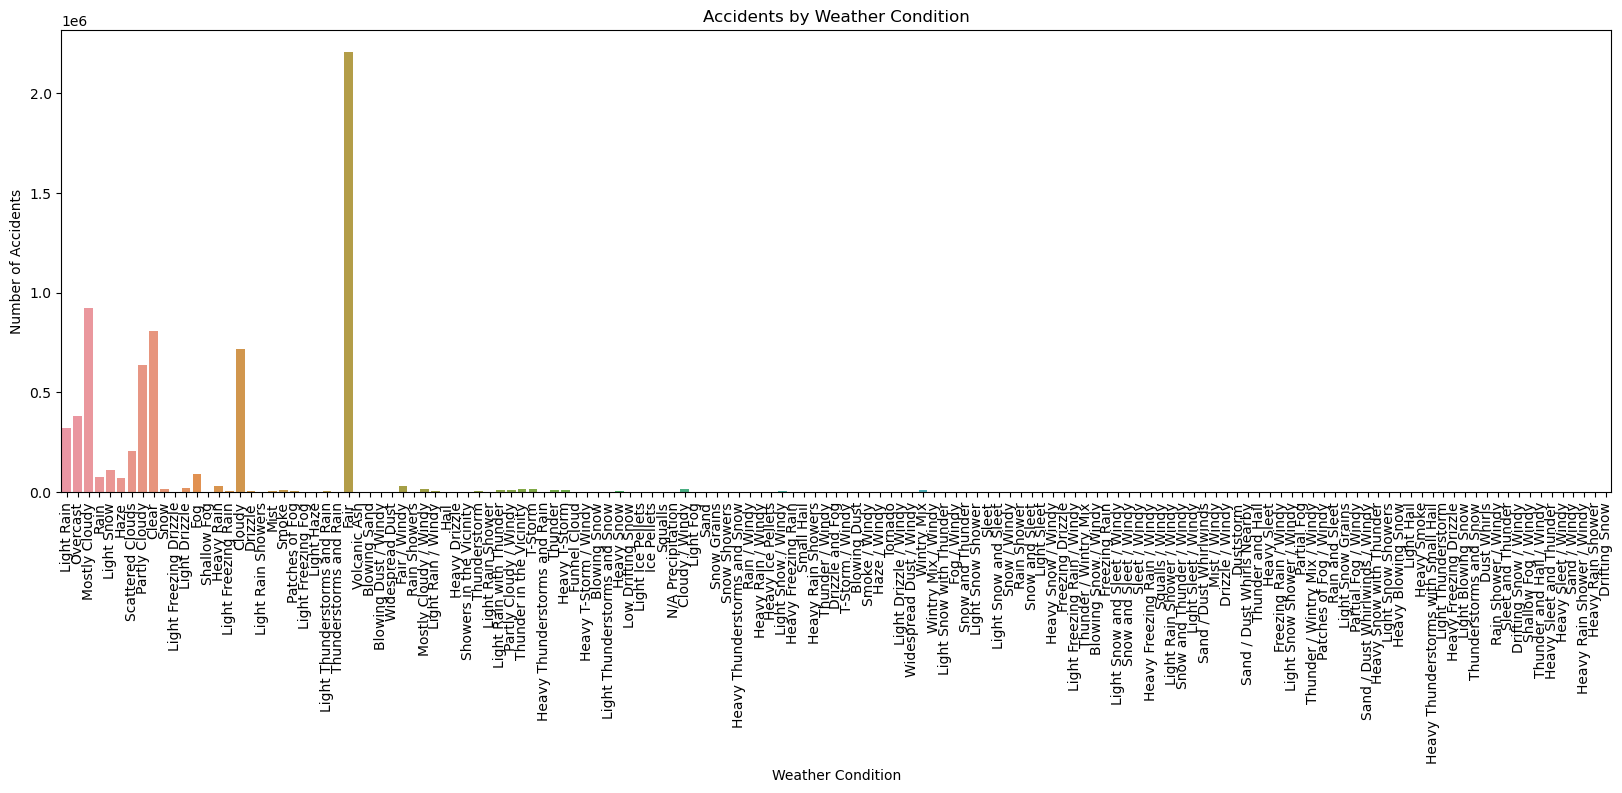

In [38]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Weather_Condition', data=df)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

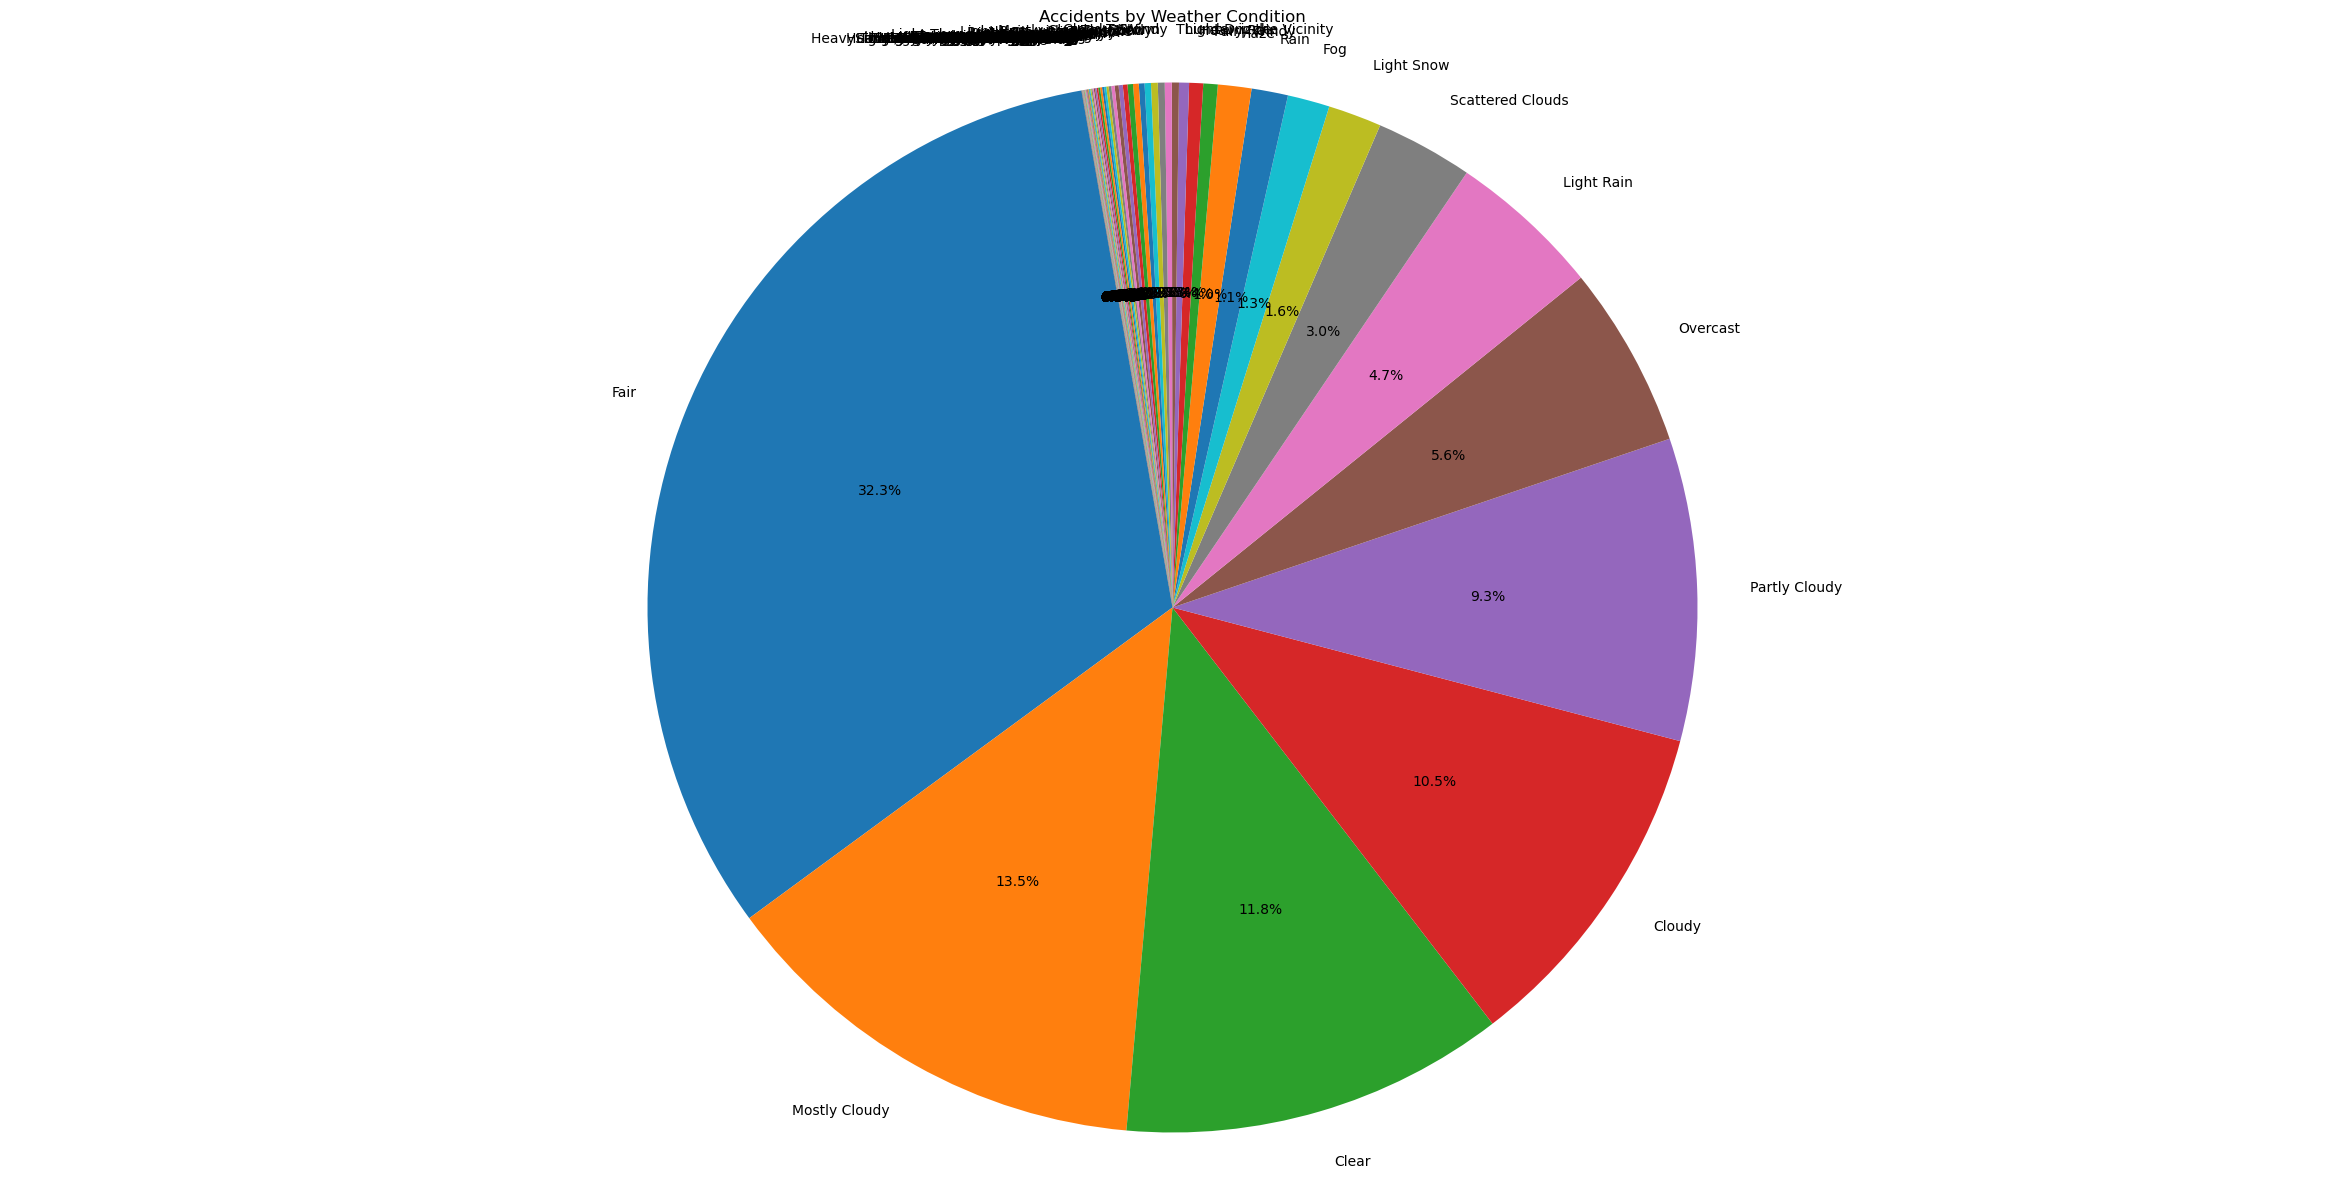

In [49]:
weather_counts = df['Weather_Condition'].value_counts(5)
plt.figure(figsize=(30, 15))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Accidents by Weather Condition')
plt.axis('equal') 
plt.show()

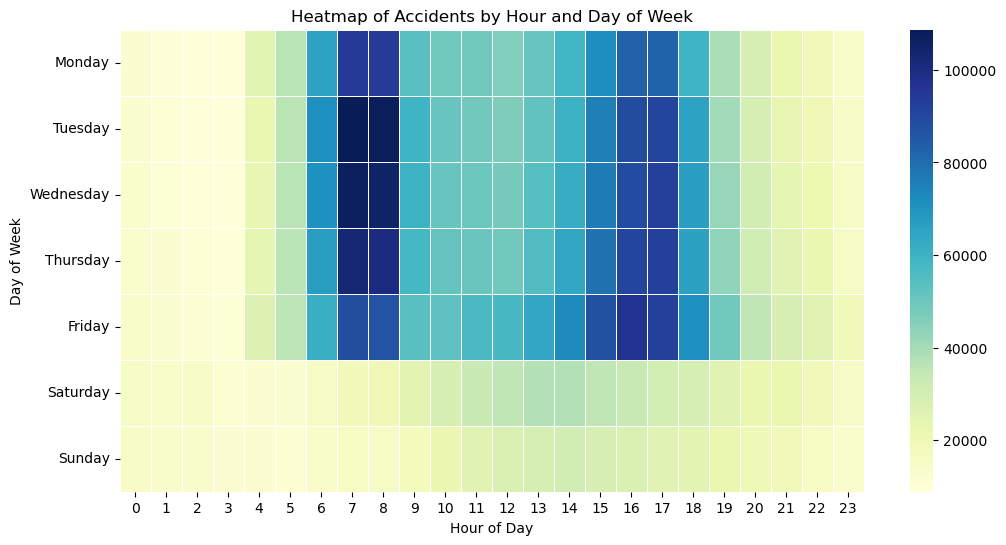

In [50]:
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Accidents by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=temperature.index, y=temperature.values(5))
plt.show(10);